# Inaugural Project

In [1]:
import numpy as np
import numba as nb

from mpl_toolkits.mplot3d import Axes3D # Used implictely when doing 3D plots
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from scipy import optimize

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

In [2]:
# Setting up the model 
from Household import HouseholdSpecializationModelClass
model=HouseholdSpecializationModelClass()
par=model.par
sol=model.sol

# Question 1

In [3]:
# Creating list of alpha and sigma values.
alpha_values =  [0.25, 0.5, 0.75]
sigma_values =  [0.5, 1.0, 1.5]

# Creating a solution matrix 
H_ratio = np.zeros((len(alpha_values), len(sigma_values)))

# Making loop which iterates over each combination of alpha_values and sigma_values and calculates the ratio between HF and HM
for i, alpha in enumerate(alpha_values):
    for j, sigma in enumerate(sigma_values):
        # Setting the parameters in the model to alpha and sigma
        model.par.alpha = alpha
        model.par.sigma = sigma
        # Solving model
        opt = model.solve_discrete()
        H_ratio[i, j] = opt.HF/opt.HM
print(H_ratio)


/Users/HP/Documents/Skole/Uni/Introduction to programming and numerical analysis/projects-2023-lise-adam-1/inauguralproject/Household.py:71: RuntimeWarning: invalid value encountered in reciprocal
  H = ((1-par.alpha)*(HM+1e-8) **((par.sigma-1)/par.sigma) + par.alpha * (HF+1e-8)**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))
/Users/HP/Documents/Skole/Uni/Introduction to programming and numerical analysis/projects-2023-lise-adam-1/inauguralproject/Household.py:78: RuntimeWarning: invalid value encountered in reciprocal
  utility = np.fmax(Q,1e-8)**(1-par.rho)/(1-par.rho)


[[0.54545455 0.30769231 0.21428571]
 [1.         1.         1.        ]
 [1.83333333 3.25       4.66666667]]


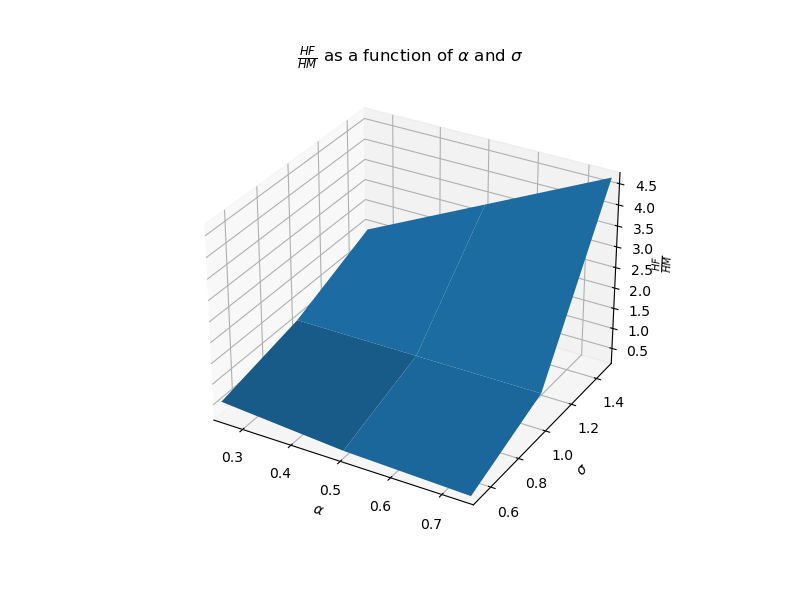

In [4]:
# To make plot interactive
%matplotlib widget 

# Creating 3d figures
fig = plt.figure(figsize=(8,6)) 
ax = plt.axes(projection='3d') 

# Creating plot
x = alpha_values
y = sigma_values
X, Y = np.meshgrid(x, y)
Z = H_ratio

# Plotting surface
ax.plot_surface(X, Y, Z)

# Setting labels
ax.set_xlabel(r'$\alpha$') 
ax.set_ylabel(r'$\sigma$')
ax.set_zlabel(r'$\frac{HF}{HM}$')
ax.zaxis.labelpad=0.05

# Setting axis ranges to fit with alpha and sigma values
ax.set_xlim(0.25, 0.75)
ax.set_ylim(0.5, 1.5)

# Adding title
ax.set_title(r'$\frac{HF}{HM}$ as a function of $\alpha$ and $\sigma$')

plt.show()



# Question 2

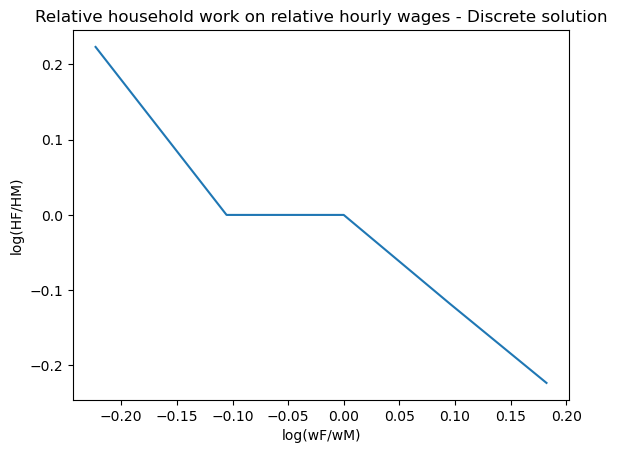

In [5]:
# Baseline model parameters
model.par.alpha=0.5
model.par.sigma=1

# Using discrete solver
model.solve_wF_vec(discrete=True)

# Creating arrays with necessary variables
log_wF_vec=np.log(model.par.wF_vec) # Since wM=1 we just take log of WF_vec
log_HFHM=np.log(model.sol.HF_vec/model.sol.HM_vec)

# Creating 2d plot of log(HF/HM) against log(WF/WM)
%matplotlib inline
fig=plt.figure()
ax= fig.add_subplot(1,1,1)
ax.plot(log_wF_vec,log_HFHM)
ax.set_xlabel('log(wF/wM)')
ax.set_ylabel('log(HF/HM)')
ax.set_title(r'Relative household work on relative hourly wages - Discrete solution')
plt.show()


# Question 3

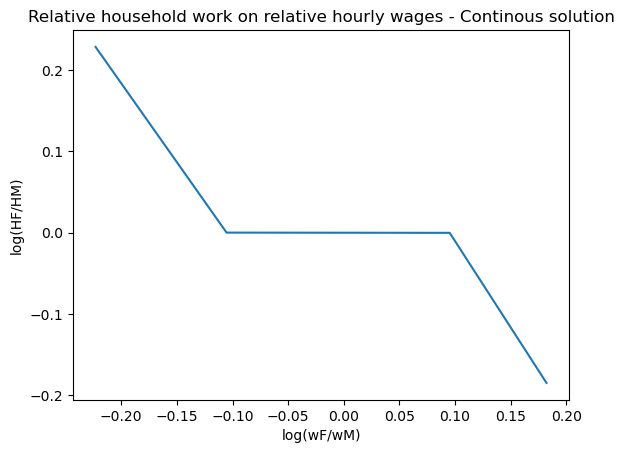

In [6]:
# Calling method that solves the model with continuos set of choices
model.solve_wF_vec()

# Creating arrays with necessary variables as before, but now from continous solution.
log_wF_vec=np.log(model.par.wF_vec)
log_HFHM=np.log(model.sol.HF_vec/model.sol.HM_vec)

# Creating 2d plot of log(HF/HM) against log(WF/WM)
%matplotlib inline
fig=plt.figure()
ax= fig.add_subplot(1,1,1)
ax.plot(log_wF_vec,log_HFHM)
ax.set_xlabel('log(wF/wM)')
ax.set_ylabel('log(HF/HM)')
ax.set_title(r'Relative household work on relative hourly wages - Continous solution')
plt.show()

# Question 4

In [7]:
# Calling method that estimates alpha and sigma 
model.estimate()
print(model.sol.alpha_estimate, model.sol.sigma_estimate)

# Finding deviation function value
x=[model.sol.alpha_estimate, model.sol.sigma_estimate]
model.objective_regression(x)

0.7863604530503224 0.2581655971679559


0.022274276158188236

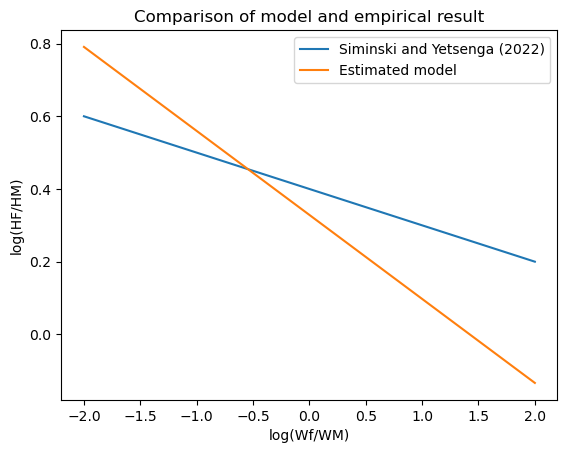

In [8]:
# To illustrate how good the estimated model fits that data, we plot the two regression lines.

# Creating linspace for x-axis
x1 = np.linspace(-2, 2, 100)

# Regression from Siminski and Yetsenga (2022)
log_HFHM = 0.4 - 0.1*x1
logHFHM_est = model.sol.beta0 +model.sol.beta1*x1

# Plotting the two regressions and adding label and legend
plt.plot(x1, log_HFHM, label='Siminski and Yetsenga (2022)')
plt.plot(x1, logHFHM_est, label='Estimated model')
plt.xlabel('log(Wf/WM)')
plt.ylabel('log(HF/HM)')
plt.title('Comparison of model and empirical result')
plt.legend()
plt.show()



Our estimated parameters alpha=0.79 sigma=0.26. This means that women are relatively more productive in the home than men and that men and women's work in the household are not that good substitutes.

Compared with Siminski and Yetsenga (2022) the estimated regression line with a more negative slope and a higher starting value. 

# Question 5

We let the man and woman have different marginal disutilities of working, such that now:

$$
\begin{align*}
\max_{L_{W},L_{M},H_{W},H_{M}}&\frac{Q^{1-\rho}}{1-\rho}-\nu\left(\frac{T_{M}^{1+\epsilon_M}}{1+\epsilon_M}+\frac{T_{W}^{1+\epsilon_W}}{1+\epsilon_W}\right) \\
\end{align*}
$$

In [9]:
# Setting up new model
model_1=HouseholdSpecializationModelClass()
sol=model_1.sol
par=model_1.par 

# Setting model extension in use 
par.gender=1

In [10]:
# Calling estimation.
model_1.estimate()
print(sol.sigma_estimate, sol.epsilon_w_estimate, sol.epsilon_m_estimate)

# Finding deviation function value
x = [sol.sigma_estimate,sol.epsilon_w_estimate,sol.epsilon_m_estimate]
model_1.objective_regression(x)


0.531362364371446 0.9284577805876394 0.93014097358452


0.17498180049576112

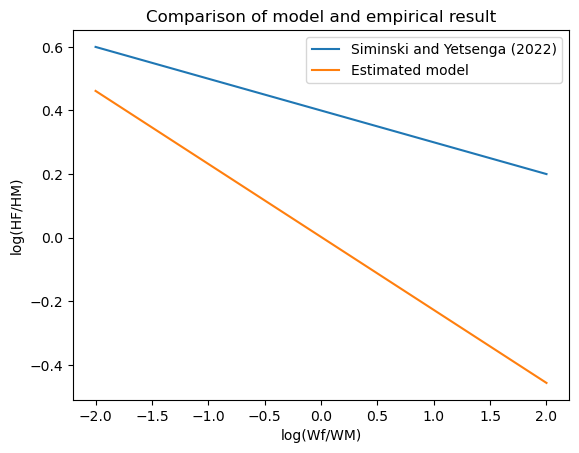

In [11]:
# Creating linspace for x-axis
x1 = np.linspace(-2, 2, 100)

# Regression from Siminski and Yetsenga (2022)
log_HFHM = 0.4 - 0.1*x1
logHFHM_est = sol.beta0 + sol.beta1*x1

# Plotting the two regressions and adding label and legend
plt.plot(x1, log_HFHM, label='Siminski and Yetsenga (2022)')
plt.plot(x1, logHFHM_est, label='Estimated model')
plt.xlabel('log(Wf/WM)')
plt.ylabel('log(HF/HM)')
plt.title('Comparison of model and empirical result')
plt.legend()
plt.show()


In our extension of the model in which we allowed men and women to have different marginal disutility of work, we estimated men to have a larger marginal disutilty of work. This resulted in matching the sign of beta1 to the data, however we also ended up with a worse fit to the data overall.